# **High Inflation**

In [ ]:
import pandas as pd

excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

print("Heading of the data:")
display(df.head())

Heading of the data:


,id,Profitability,Probability,New Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,Politician,PoB
0,1,0.02,0.579913,0.011598,23.76,53.09,3.43,21.22,2,9.16,2,0,0.434080,0.443087,0.141194,0
1,2,3.99,0.122876,0.490274,41.85,45.30,3.22,21.83,4,41.42,1,0,0.740060,0.860709,0.109703,0
2,3,41.98,0.514616,21.603560,61.84,51.16,3.18,20.54,3,5.88,3,1,0.194094,0.306597,0.388709,0
3,4,8.48,0.004706,0.039907,25.61,115.49,3.26,20.59,3,11.08,2,0,0.004992,0.400907,0.221843,0
4,5,-1.94,0.461866,-0.896021,74.24,13.57,3.26,18.73,3,24.61,1,0,0.381754,0.797531,0.515557,0


# Training the Model (Random Forest Regression)

In [ ]:
print(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet',
       'Politician', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Prepare the data
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'

X = df[features]
Y = df[target]

print("Features (X) heading:")
display(X.head())

print("\nTarget (Y) heading:")
display(Y.head())

# Split the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTraining data shapes:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nTesting data shapes:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

print("\nRandom Forest model trained successfully.")

Features (X) heading:


,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,PoB
0,23.76,53.09,3.43,21.22,2,9.16,2,0,0.434080,0.443087,0
1,41.85,45.30,3.22,21.83,4,41.42,1,0,0.740060,0.860709,0
2,61.84,51.16,3.18,20.54,3,5.88,3,1,0.194094,0.306597,0
3,25.61,115.49,3.26,20.59,3,11.08,2,0,0.004992,0.400907,0
4,74.24,13.57,3.26,18.73,3,24.61,1,0,0.381754,0.797531,0



Target (Y) heading:


,New Profitability
0,0.011598
1,0.490274
2,21.603560
3,0.039907
4,-0.896021



Training data shapes:
X_train shape: (97, 11)
Y_train shape: (97,)

Testing data shapes:
X_test shape: (25, 11)
Y_test shape: (25,)

Random Forest model trained successfully.


# Calculating MSE & R^2 High Inflation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 25.13
R-squared (R2): -1.16


# Feature Importance High Inflation



In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importance Scores:")
display(sorted_feature_importances)

Feature Importance Scores:


,0
Firm Size,0.240645
CEO education,0.164822
CEO Experience,0.106961
debt,0.089095
RnD,0.083169
Product Sentimet,0.076820
Firm Age,0.067976
foreign sales,0.065573
Marketing,0.053042
CEO Gender,0.026929


# LASSO Sorting (if 0, remove it) High Inflation

In [ ]:
# LASSO Sorting Good Economy
from sklearn.linear_model import Lasso
import pandas as pd

# Initialize and train the LASSO model
# We use a relatively small alpha (regularization strength) here;
# you might want to experiment with different alpha values.
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X, Y)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

# Sort the features by the absolute value of their coefficients in descending order
sorted_lasso_importance = lasso_feature_importance.abs().sort_values(ascending=False)

print("LASSO Coefficients (sorted by absolute value):")
display(lasso_feature_importance[sorted_lasso_importance.index])
#  0 = No Relations
# -n = Negative Relations
# +n = Positive Relations

LASSO Coefficients (sorted by absolute value):


,0
CEO Gender,2.818236
CEO Experience,1.158033
CEO education,0.794095
Marketing,0.715789
Firm Size,0.452606
PoB,-0.221153
debt,-0.044131
foreign sales,-0.015469
RnD,-0.000349
Firm Age,0.000000


# LASSO Feature Importance High Inflation

In [ ]:
# LASSO Feature Importance High Inflation
from sklearn.linear_model import Lasso
import pandas as pd

def calculate_lasso_feature_importance(X_data, Y_data, alpha=0.1):
    """
    Calculates LASSO regression coefficients as a measure of feature importance,
    excluding features with zero coefficients.

    Args:
        X_data (pd.DataFrame): The feature matrix.
        Y_data (pd.Series or np.array): The target variable.
        alpha (float): The regularization strength for the Lasso model.

    Returns:
        pd.Series: Sorted LASSO coefficients by absolute value, excluding zeros.
    """

    if not isinstance(X_data, pd.DataFrame):
        raise TypeError("X_data must be a pandas DataFrame.")
    if not isinstance(Y_data, (pd.Series, pd.DataFrame)):
        raise TypeError("Y_data must be a pandas Series or DataFrame.")

    # Initialize and train the LASSO model
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_data, Y_data)

    # Get the coefficients
    lasso_coefficients = lasso.coef_

    # Get the names of the features
    feature_names = X_data.columns

    # Create a pandas Series for better visualization
    lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

    # Filter out features with a coefficient of 0
    non_zero_importance = lasso_feature_importance[lasso_feature_importance != 0]

    # Sort the non-zero features by the absolute value of their coefficients in descending order
    sorted_non_zero_importance = non_zero_importance.abs().sort_values(ascending=False)

    print("LASSO Coefficients (sorted by absolute value, excluding zeros):")
    display(non_zero_importance[sorted_non_zero_importance.index])
    print("\nInterpretation: -n = Negative Relations, +n = Positive Relations")
    return non_zero_importance[sorted_non_zero_importance.index]

# --- Start of fix: Ensure df, features, and target are defined ---
# >>> Please verify and update this path if necessary <<<
excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'
# --- End of fix ---

# Use the X and Y defined for the 'High Inflation' section
X_good_economy = df[features]
Y_good_economy = df[target]

print("\n--- LASSO Feature Importance for High Inflation Data ---")
calculate_lasso_feature_importance(X_good_economy, Y_good_economy, alpha=0.1)



--- LASSO Feature Importance for High Inflation Data ---
LASSO Coefficients (sorted by absolute value, excluding zeros):


,0
CEO Gender,2.818236
CEO Experience,1.158033
CEO education,0.794095
Marketing,0.715789
Firm Size,0.452606
PoB,-0.221153
debt,-0.044131
foreign sales,-0.015469
RnD,-0.000349



Interpretation: -n = Negative Relations, +n = Positive Relations


,0
CEO Gender,2.818236
CEO Experience,1.158033
CEO education,0.794095
Marketing,0.715789
Firm Size,0.452606
PoB,-0.221153
debt,-0.044131
foreign sales,-0.015469
RnD,-0.000349


# OLS Regression (if P>|z| under 0.1, keep it) High Inflation

In [ ]:
#
import statsmodels.api as sm

# Add a constant (intercept) to the features
X_with_intercept = sm.add_constant(X)

# Initialize and train the OLS model
# We use the 'hc1' option for robust standard errors (White's standard errors)
ols_model = sm.OLS(Y, X_with_intercept)
results = ols_model.fit(cov_type='hc1')

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      New Profitability   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.736
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0745
Time:                        07:53:48   Log-Likelihood:                -367.02
No. Observations:                 122   AIC:                             758.0
Df Residuals:                     110   BIC:                             791.7
Df Model:                          11                                         
Covariance Type:                  hc1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.8220      8.637  

# OLS Regression Feature Importance High Inflation

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'results' object is available from the 'High Inflation' OLS regression (cell 38GT_2VQKP53)
# If not, the OLS model would need to be re-run here to obtain 'results'

# --- Start of fix: Ensure df, features, and target are defined for OLS model ---
# This block ensures 'X' and 'Y' are defined before running OLS, if this cell is run independently
# However, it's safer to rely on the 'results' object being generated by a previous execution of 38GT_2VQKP53

# For standalone execution, uncomment and verify path:
# excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
# df = pd.read_excel(excel_file_path)
# features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
# target = 'New Profitability'
# X = df[features]
# Y = df[target]
# X_with_intercept = sm.add_constant(X)
# ols_model = sm.OLS(Y, X_with_intercept)
# results = ols_model.fit(cov_type='hc1')
# --- End of fix ---

# Get the P-values and coefficients from the OLS results
p_values = results.pvalues
coefficients = results.params

# Filter for features with P-values less than 0.1
significant_features_mask = p_values < 0.1
significant_p_values = p_values[significant_features_mask]
significant_coefficients = coefficients[significant_features_mask]

# Create a DataFrame for better visualization
significant_results = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-value': significant_p_values
})

# Sort by the absolute value of coefficients for importance, excluding the 'const' if present
significant_results_sorted = significant_results.drop('const', errors='ignore').reindex(significant_coefficients.drop('const', errors='ignore').abs().sort_values(ascending=False).index)

print("Significant OLS Features (P-value < 0.1) from High Inflation Data:")
display(significant_results_sorted)
print("\nInterpretation: Coefficients indicate the direction and magnitude of the relationship.")


Significant OLS Features (P-value < 0.1) from High Inflation Data:


,Coefficient,P-value
CEO Gender,3.338896,0.015642



Interpretation: Coefficients indicate the direction and magnitude of the relationship.


# PCA (If larger than 0.7, keep it) High Inflation


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Define the features (X)
X = df[features]

# Initialize and fit PCA
# You can specify the number of components, or leave it as None to keep all components
pca = PCA()
pca.fit(X)

# Get the loading factors (components)
# The loading factors are the eigenvectors of the covariance matrix
loading_factors = pca.components_

# Create a DataFrame for better visualization of loading factors
loading_factors_df = pd.DataFrame(loading_factors, columns=X.columns, index=[f'PC{i+1}' for i in range(loading_factors.shape[0])])

print("Principal Component Analysis Loading Factors:")
print(loading_factors_df)

Principal Component Analysis Loading Factors:
          debt           RnD  Firm Age  Firm Size  CEO Experience  \
PC1  -0.002216  9.931249e-01  0.000434   0.000475        0.001620   
PC2  -0.007652  1.169902e-01 -0.002204  -0.001811        0.002525   
PC3   0.999930  3.104558e-03 -0.001244  -0.004375       -0.003073   
PC4   0.004327 -4.719162e-04  0.056307   0.991646        0.067326   
PC5  -0.001447  1.748275e-05 -0.045801   0.008410       -0.617958   
PC6   0.002931 -2.048793e-03  0.565149  -0.097386        0.620285   
PC7   0.003997  3.748678e-04  0.316198   0.066229       -0.182277   
PC8  -0.003317  1.214357e-03  0.743437  -0.024448       -0.404124   
PC9   0.004456  4.950239e-04  0.070842   0.012392       -0.079751   
PC10 -0.000674  4.662870e-04 -0.087509   0.043784        0.037502   
PC11 -0.000893  7.996973e-07 -0.099880   0.002356        0.156576   

      foreign sales  CEO education  CEO Gender  Marketing  Product Sentimet  \
PC1       -0.117011       0.001569    0.000619

# PCA Feature Importance High Inflation

In [ ]:
# PCA Feature Importance High Inflation
# Identify features with absolute loading factors greater than 0.7
selected_features = set()
threshold = 0.7

for pc_name, row in loading_factors_df.iterrows():
    for feature, loading in row.items():
        if abs(loading) > threshold:
            selected_features.add(feature)

print(f"Features with an absolute loading factor greater than {threshold} on any principal component:")
if selected_features:
    for feature in sorted(list(selected_features)):
        print(f"- {feature}")
else:
    print("No features met the threshold of > 0.7 for any principal component.")

# Now, use these selected features for Random Forest Feature Importance
from sklearn.ensemble import RandomForestRegressor

# Filter the original DataFrame X to include only the selected features
X_selected = X[list(selected_features)]

# Define the target variable Y (already loaded as part of the 'High Inflation' setup)
# Y is already defined from the 'High Inflation' data loading in cell 1jEqoBiQolad or earlier.
# For clarity, let's ensure Y is explicitly from the 'High Inflation' df
excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
df_high_inflation = pd.read_excel(excel_file_path)
target = 'New Profitability'
Y_high_inflation = df_high_inflation[target]

# Train a RandomForestRegressor on the selected features
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_selected, Y_high_inflation)

# Get feature importances from this new model
feature_importances_pca = rf_model_pca.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_pca = pd.Series(feature_importances_pca, index=X_selected.columns)

# Sort the features by importance in descending order
sorted_feature_importances_pca = feature_importance_series_pca.sort_values(ascending=False)

print("\nRandom Forest Feature Importance for PCA Selected Features (High Inflation):")
display(sorted_feature_importances_pca)


Features with an absolute loading factor greater than 0.7 on any principal component:
- CEO Gender
- CEO education
- Firm Age
- Firm Size
- Marketing
- PoB
- Product Sentimet
- RnD
- debt
- foreign sales

Random Forest Feature Importance for PCA Selected Features (High Inflation):


,0
Firm Size,0.240876
CEO education,0.157967
debt,0.106355
Firm Age,0.096376
foreign sales,0.093162
Product Sentimet,0.090119
Marketing,0.089827
RnD,0.072351
PoB,0.032713
CEO Gender,0.020254


# **Good Economy**

In [ ]:
import pandas as pd

excel_file_path = "/content/sample_data/CW4_Good Economy - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

print("Heading of the data:")
display(df.head())

Heading of the data:


,id,Profitability,Probability,New Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,Politician,PoB
0,1,1.638487,0.579913,0.950180,23.76,53.09,3.43,21.22,2,9.16,2,0,0.434080,0.443087,0.141194,0
1,2,1.053044,0.122876,0.129394,41.85,45.30,3.22,21.83,4,41.42,1,0,0.740060,0.860709,0.109703,0
2,3,1.049475,0.514616,0.540076,61.84,51.16,3.18,20.54,3,5.88,3,1,0.194094,0.306597,0.388709,0
3,4,1.999807,0.004706,0.009411,25.61,115.49,3.26,20.59,3,11.08,2,0,0.004992,0.400907,0.221843,0
4,5,1.382063,0.461866,0.638328,74.24,13.57,3.26,18.73,3,24.61,1,0,0.381754,0.797531,0.515557,0


Training the Model (Decision Tree Regression)

In [ ]:
print(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet',
       'Politician', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Prepare the data
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'

X = df[features]
Y = df[target]

print("Features (X) heading:")
display(X.head())

print("\nTarget (y) heading:")
display(Y.head())

# Split the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTraining data shapes:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nTesting data shapes:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

print("\nRandom Forest model trained successfully.")

Features (X) heading:


,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,PoB
0,23.76,53.09,3.43,21.22,2,9.16,2,0,0.434080,0.443087,0
1,41.85,45.30,3.22,21.83,4,41.42,1,0,0.740060,0.860709,0
2,61.84,51.16,3.18,20.54,3,5.88,3,1,0.194094,0.306597,0
3,25.61,115.49,3.26,20.59,3,11.08,2,0,0.004992,0.400907,0
4,74.24,13.57,3.26,18.73,3,24.61,1,0,0.381754,0.797531,0



Target (y) heading:


,New Profitability
0,0.950180
1,0.129394
2,0.540076
3,0.009411
4,0.638328



Training data shapes:
X_train shape: (97, 11)
Y_train shape: (97,)

Testing data shapes:
X_test shape: (25, 11)
Y_test shape: (25,)

Random Forest model trained successfully.


# Calculating MSE & R^2 Good Economy

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared (R2) score: {r2:.2f}")

Mean Squared Error (MSE): 0.20
R-squared (R2) score: -0.26


# Feature Importance Good Economy

In [ ]:
# Get feature importance from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

print("Feature Importance Scores:")
display(sorted_feature_importance)

Feature Importance Scores:


,0
debt,0.183677
Firm Size,0.154843
RnD,0.131130
Marketing,0.128193
foreign sales,0.115457
Product Sentimet,0.108818
Firm Age,0.106167
PoB,0.021193
CEO education,0.020279
CEO Experience,0.015153


# LASSO Sorting (if 0, remove it) Good Economy

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Initialize and train the LASSO model
# We use a relatively small alpha (regularization strength) here;
# you might want to experiment with different alpha values.
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X, Y)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

# Sort the features by the absolute value of their coefficients in descending order
sorted_lasso_importance = lasso_feature_importance.abs().sort_values(ascending=False)

print("LASSO Coefficients (sorted by absolute value):")
display(lasso_feature_importance[sorted_lasso_importance.index])

LASSO Coefficients (sorted by absolute value):


,0
debt,-0.001510
foreign sales,-0.001088
RnD,-0.000049
Firm Age,0.000000
Firm Size,0.000000
CEO Experience,-0.000000
CEO education,-0.000000
CEO Gender,-0.000000
Marketing,0.000000
Product Sentimet,-0.000000


# LASSO Feature Importance Good Economy

In [ ]:
# LASSO Feature Importance Good Economy
from sklearn.linear_model import Lasso
import pandas as pd

def calculate_lasso_feature_importance(X_data, Y_data, alpha=0.1):
    """
    Calculates LASSO regression coefficients as a measure of feature importance,
    excluding features with zero coefficients.

    Args:
        X_data (pd.DataFrame): The feature matrix.
        Y_data (pd.Series or np.array): The target variable.
        alpha (float): The regularization strength for the Lasso model.

    Returns:
        pd.Series: Sorted LASSO coefficients by absolute value, excluding zeros.
    """

    if not isinstance(X_data, pd.DataFrame):
        raise TypeError("X_data must be a pandas DataFrame.")
    if not isinstance(Y_data, (pd.Series, pd.DataFrame)):
        raise TypeError("Y_data must be a pandas Series or DataFrame.")

    # Initialize and train the LASSO model
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_data, Y_data)

    # Get the coefficients
    lasso_coefficients = lasso.coef_

    # Get the names of the features
    feature_names = X_data.columns

    # Create a pandas Series for better visualization
    lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

    # Filter out features with a coefficient of 0
    non_zero_importance = lasso_feature_importance[lasso_feature_importance != 0]

    # Sort the non-zero features by the absolute value of their coefficients in descending order
    sorted_non_zero_importance = non_zero_importance.abs().sort_values(ascending=False)

    print("LASSO Coefficients (sorted by absolute value, excluding zeros):")
    display(non_zero_importance[sorted_non_zero_importance.index])
    print("\nInterpretation: -n = Negative Relations, +n = Positive Relations")
    return non_zero_importance[sorted_non_zero_importance.index]

# --- Start of fix: Ensure df, features, and target are defined ---
# >>> Please verify and update this path if necessary <<<
excel_file_path = "/content/sample_data/CW4_Good Economy - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'
# --- End of fix ---

# Use the X and Y defined for the 'Good Economy' section
X_good_economy = df[features]
Y_good_economy = df[target]

print("\n--- LASSO Feature Importance for Good Economy Data ---")
calculate_lasso_feature_importance(X_good_economy, Y_good_economy, alpha=0.1)



--- LASSO Feature Importance for Good Economy Data ---
LASSO Coefficients (sorted by absolute value, excluding zeros):


,0
debt,-0.001510
foreign sales,-0.001088
RnD,-0.000049



Interpretation: -n = Negative Relations, +n = Positive Relations


,0
debt,-0.001510
foreign sales,-0.001088
RnD,-0.000049


# OLS Regression (if P>|z| under 0.1, keep it) Good Economy

In [ ]:
import statsmodels.api as sm

# Add a constant (intercept) to the features
X_with_intercept = sm.add_constant(X)

# Initialize and train the OLS model
# We use the 'hc1' option for robust standard errors (White's standard errors)
ols_model = sm.OLS(Y, X_with_intercept)
results = ols_model.fit(cov_type='hc1')

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      New Profitability   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.8002
Date:                Tue, 02 Dec 2025   Prob (F-statistic):              0.640
Time:                        07:53:49   Log-Likelihood:                -73.189
No. Observations:                 122   AIC:                             170.4
Df Residuals:                     110   BIC:                             204.0
Df Model:                          11                                         
Covariance Type:                  hc1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9429      0.594  

# OLS Regression Feature Importance Good Economy

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'results' object is available from the 'Good Economy' OLS regression
# If not, the OLS model would need to be re-run here to obtain 'results'

# --- Start of fix: Ensure df, features, and target are defined for OLS model ---
# This block ensures 'X' and 'Y' are defined before running OLS, if this cell is run independently
# However, it's safer to rely on the 'results' object being generated by a previous execution of 38GT_2VQKP53

# For standalone execution, uncomment and verify path:
# excel_file_path = "/content/sample_data/CW4_Good Economy - Melvin & Dhita.xlsx"
# df = pd.read_excel(excel_file_path)
# features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
# target = 'New Profitability'
# X = df[features]
# Y = df[target]
# X_with_intercept = sm.add_constant(X)
# ols_model = sm.OLS(Y, X_with_intercept)
# results = ols_model.fit(cov_type='hc1')
# --- End of fix ---

# Get the P-values and coefficients from the OLS results
p_values = results.pvalues
coefficients = results.params

# Filter for features with P-values less than 0.1
significant_features_mask = p_values < 0.1
significant_p_values = p_values[significant_features_mask]
significant_coefficients = coefficients[significant_features_mask]

# Create a DataFrame for better visualization
significant_results = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-value': significant_p_values
})

# Sort by the absolute value of coefficients for importance, excluding the 'const' if present
significant_results_sorted = significant_results.drop('const', errors='ignore').reindex(significant_coefficients.drop('const', errors='ignore').abs().sort_values(ascending=False).index)

print("Significant OLS Features (P-value < 0.1) from Good Economy Data:")
display(significant_results_sorted)
print("\nInterpretation: Coefficients indicate the direction and magnitude of the relationship.")

Significant OLS Features (P-value < 0.1) from Good Economy Data:


,Coefficient,P-value
PoB,-0.153182,0.079938



Interpretation: Coefficients indicate the direction and magnitude of the relationship.


# PCA (If larger than 0.7, keep it) Good Economy



In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Define the features (X)
X = df[features]

# Initialize and fit PCA
# You can specify the number of components, or leave it as None to keep all components
pca = PCA()
pca.fit(X)

# Get the loading factors (components)
# The loading factors are the eigenvectors of the covariance matrix
loading_factors = pca.components_

# Create a DataFrame for better visualization of loading factors
loading_factors_df = pd.DataFrame(loading_factors, columns=X.columns, index=[f'PC{i+1}' for i in range(loading_factors.shape[0])])

print("Principal Component Analysis Loading Factors:")
print(loading_factors_df)

Principal Component Analysis Loading Factors:
          debt           RnD  Firm Age  Firm Size  CEO Experience  \
PC1  -0.002216  9.931249e-01  0.000434   0.000475        0.001620   
PC2  -0.007652  1.169902e-01 -0.002204  -0.001811        0.002525   
PC3   0.999930  3.104558e-03 -0.001244  -0.004375       -0.003073   
PC4   0.004327 -4.719162e-04  0.056307   0.991646        0.067326   
PC5  -0.001447  1.748275e-05 -0.045801   0.008410       -0.617958   
PC6   0.002931 -2.048793e-03  0.565149  -0.097386        0.620285   
PC7   0.003997  3.748678e-04  0.316198   0.066229       -0.182277   
PC8  -0.003317  1.214357e-03  0.743437  -0.024448       -0.404124   
PC9   0.004456  4.950239e-04  0.070842   0.012392       -0.079751   
PC10 -0.000674  4.662870e-04 -0.087509   0.043784        0.037502   
PC11 -0.000893  7.996973e-07 -0.099880   0.002356        0.156576   

      foreign sales  CEO education  CEO Gender  Marketing  Product Sentimet  \
PC1       -0.117011       0.001569    0.000619

# PCA Feature Importance Good Economy

In [ ]:
# Identify features with absolute loading factors greater than 0.7
selected_features = set()
threshold = 0.7

for pc_name, row in loading_factors_df.iterrows():
    for feature, loading in row.items():
        if abs(loading) > threshold:
            selected_features.add(feature)

print(f"Features with an absolute loading factor greater than {threshold} on any principal component:")
if selected_features:
    for feature in sorted(list(selected_features)):
        print(f"- {feature}")
else:
    print("No features met the threshold of > 0.7 for any principal component.")

# Now, use these selected features for Random Forest Feature Importance
from sklearn.ensemble import RandomForestRegressor

# Filter the original DataFrame X to include only the selected features
X_selected = X[list(selected_features)]

# Define the target variable Y (already loaded as part of the 'Good Economy' setup)
# Y is already defined from the 'Good Economy' data loading in cell 1jEqoBiQolad or earlier.
# For clarity, let's ensure Y is explicitly from the 'Good Economy' df
excel_file_path = "/content/sample_data/CW4_Good Economy - Melvin & Dhita.xlsx"
df_good_economy = pd.read_excel(excel_file_path)
target = 'New Profitability'
Y_good_economy = df_good_economy[target]

# Train a RandomForestRegressor on the selected features
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_selected, Y_good_economy)

# Get feature importances from this new model
feature_importances_pca = rf_model_pca.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_pca = pd.Series(feature_importances_pca, index=X_selected.columns)

# Sort the features by importance in descending order
sorted_feature_importances_pca = feature_importance_series_pca.sort_values(ascending=False)

print("\nRandom Forest Feature Importance for PCA Selected Features (Good Economy):")
display(sorted_feature_importances_pca)


Features with an absolute loading factor greater than 0.7 on any principal component:
- CEO Gender
- CEO education
- Firm Age
- Firm Size
- Marketing
- PoB
- Product Sentimet
- RnD
- debt
- foreign sales

Random Forest Feature Importance for PCA Selected Features (Good Economy):


,0
Firm Size,0.159998
Firm Age,0.156022
foreign sales,0.149679
Marketing,0.136678
Product Sentimet,0.114667
debt,0.112305
RnD,0.112072
CEO education,0.031075
CEO Gender,0.015696
PoB,0.011807


# **Original Data**

In [ ]:
import pandas as pd

excel_file_path = "/content/sample_data/CW4_Original Data - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

print("Heading of the data:")
display(df.head())

Heading of the data:


,id,Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,Politician,PoB
0,1,0.02,23.76,53.09,3.43,21.22,2,9.16,2,0,0.128310,0.138956,0.609161,1
1,2,3.99,41.85,45.30,3.22,21.83,4,41.42,1,0,0.442919,0.496034,0.358785,0
2,3,41.98,61.84,51.16,3.18,20.54,3,5.88,3,1,0.462081,0.684095,0.651304,1
3,4,8.48,25.61,115.49,3.26,20.59,3,11.08,2,0,0.900932,0.356025,0.917849,1
4,5,-1.94,74.24,13.57,3.26,18.73,3,24.61,1,0,0.416955,0.215846,0.558252,0


# Training the Model (Random Forest Regression)

In [ ]:
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
       'Marketing', 'Product Sentimet', 'Politician', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Prepare the data
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'Profitability'

X = df[features]
Y = df[target]

print("Features (X) heading:")
display(X.head())

print("\nTarget (Y) heading:")
display(Y.head())

# Split the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTraining data shapes:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nTesting data shapes:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

print("\nRandom Forest model trained successfully.")

Features (X) heading:


,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product Sentimet,PoB
0,23.76,53.09,3.43,21.22,2,9.16,2,0,0.128310,0.138956,1
1,41.85,45.30,3.22,21.83,4,41.42,1,0,0.442919,0.496034,0
2,61.84,51.16,3.18,20.54,3,5.88,3,1,0.462081,0.684095,1
3,25.61,115.49,3.26,20.59,3,11.08,2,0,0.900932,0.356025,1
4,74.24,13.57,3.26,18.73,3,24.61,1,0,0.416955,0.215846,0



Target (Y) heading:


,Profitability
0,0.02
1,3.99
2,41.98
3,8.48
4,-1.94



Training data shapes:
X_train shape: (97, 11)
Y_train shape: (97,)

Testing data shapes:
X_test shape: (25, 11)
Y_test shape: (25,)

Random Forest model trained successfully.


# Calculating MSE & R^2 Original Data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 138.37
R-squared (R2): -2.01


# Feature Importance Original Data

In [ ]:
# Get feature importance from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

print("Feature Importance Scores:")
display(sorted_feature_importance)

Feature Importance Scores:


,0
debt,0.243674
Product Sentimet,0.162175
CEO Gender,0.151599
Firm Size,0.127652
RnD,0.075889
foreign sales,0.056086
Marketing,0.052930
CEO Experience,0.052264
Firm Age,0.045498
CEO education,0.021042


# LASSO Sorting (if 0, remove it) Original Data

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Initialize and train the LASSO model
# We use a relatively small alpha (regularization strength) here;
# you might want to experiment with different alpha values.
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X, Y)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

# Sort the features by the absolute value of their coefficients in descending order
sorted_lasso_importance = lasso_feature_importance.abs().sort_values(ascending=False)

print("LASSO Coefficients (sorted by absolute value):")
display(lasso_feature_importance[sorted_lasso_importance.index])

LASSO Coefficients (sorted by absolute value):


,0
CEO Gender,10.589657
Product Sentimet,7.832309
Marketing,5.745583
PoB,5.027039
Firm Age,-1.129080
Firm Size,0.662648
CEO education,0.486494
debt,-0.183348
CEO Experience,0.041560
RnD,0.026800


# LASSO Feature Importance Original Data


In [ ]:
# LASSO Feature Importance Original Data
from sklearn.linear_model import Lasso
import pandas as pd

def calculate_lasso_feature_importance(X_data, Y_data, alpha=0.1):
    """
    Calculates LASSO regression coefficients as a measure of feature importance,
    excluding features with zero coefficients.

    Args:
        X_data (pd.DataFrame): The feature matrix.
        Y_data (pd.Series or np.array): The target variable.
        alpha (float): The regularization strength for the Lasso model.

    Returns:
        pd.Series: Sorted LASSO coefficients by absolute value, excluding zeros.
    """

    if not isinstance(X_data, pd.DataFrame):
        raise TypeError("X_data must be a pandas DataFrame.")
    if not isinstance(Y_data, (pd.Series, pd.DataFrame)):
        raise TypeError("Y_data must be a pandas Series or DataFrame.")

    # Initialize and train the LASSO model
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_data, Y_data)

    # Get the coefficients
    lasso_coefficients = lasso.coef_

    # Get the names of the features
    feature_names = X_data.columns

    # Create a pandas Series for better visualization
    lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

    # Filter out features with a coefficient of 0
    non_zero_importance = lasso_feature_importance[lasso_feature_importance != 0]

    # Sort the non-zero features by the absolute value of their coefficients in descending order
    sorted_non_zero_importance = non_zero_importance.abs().sort_values(ascending=False)

    print("LASSO Coefficients (sorted by absolute value, excluding zeros):")
    display(non_zero_importance[sorted_non_zero_importance.index])
    print("\nInterpretation: -n = Negative Relations, +n = Positive Relations")
    return non_zero_importance[sorted_non_zero_importance.index]

# --- Start of fix: Ensure df, features, and target are defined ---
# >>> Please verify and update this path if necessary <<<
excel_file_path = "/content/sample_data/CW4_Original Data - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'Profitability'
# --- End of fix ---

# Use the X and Y defined for the 'Original Data' section
X_good_economy = df[features]
Y_good_economy = df[target]

print("\n--- LASSO Feature Importance for 'Original Data' Data ---")
calculate_lasso_feature_importance(X_good_economy, Y_good_economy, alpha=0.1)



--- LASSO Feature Importance for 'Original Data' Data ---
LASSO Coefficients (sorted by absolute value, excluding zeros):


,0
CEO Gender,10.589657
Product Sentimet,7.832309
Marketing,5.745583
PoB,5.027039
Firm Age,-1.129080
Firm Size,0.662648
CEO education,0.486494
debt,-0.183348
CEO Experience,0.041560
RnD,0.026800



Interpretation: -n = Negative Relations, +n = Positive Relations


,0
CEO Gender,10.589657
Product Sentimet,7.832309
Marketing,5.745583
PoB,5.027039
Firm Age,-1.129080
Firm Size,0.662648
CEO education,0.486494
debt,-0.183348
CEO Experience,0.041560
RnD,0.026800


# OLS Regression (if P>|z| under 0.1, keep it) Original Data

In [ ]:
import statsmodels.api as sm
import pandas as pd

# --- Start of fix: Define df, X, and Y for OLS model ---
excel_file_path = "/content/sample_data/CW4_Original Data - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'Profitability'

X = df[features]
Y = df[target]
# --- End of fix ---

# Add a constant (intercept) to the features
X_with_intercept = sm.add_constant(X)

# Initialize and train the OLS model
# We use the 'hc1' option for robust standard errors (White's standard errors)
ols_model = sm.OLS(Y, X_with_intercept)
results = ols_model.fit(cov_type='hc1')

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     4.364
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.06e-05
Time:                        11:56:59   Log-Likelihood:                -458.81
No. Observations:                 122   AIC:                             941.6
Df Residuals:                     110   BIC:                             975.3
Df Model:                          11                                         
Covariance Type:                  hc1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.1090     15.484  

# OLS Regression Feature Importance Original Data

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'results' object is available from the 'Original Data' OLS regression
# If not, the OLS model would need to be re-run here to obtain 'results'

# --- Start of fix: Ensure df, features, and target are defined for OLS model ---
# This block ensures 'X' and 'Y' are defined before running OLS, if this cell is run independently
# However, it's safer to rely on the 'results' object being generated by a previous execution of 38GT_2VQKP53

# For standalone execution, uncomment and verify path:
# excel_file_path = "/content/sample_data/CW4_Original Data - Melvin & Dhita.xlsx"
# df = pd.read_excel(excel_file_path)
# features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
# target = 'New Profitability'
# X = df[features]
# Y = df[target]
# X_with_intercept = sm.add_constant(X)
# ols_model = sm.OLS(Y, X_with_intercept)
# results = ols_model.fit(cov_type='hc1')
# --- End of fix ---

# Get the P-values and coefficients from the OLS results
p_values = results.pvalues
coefficients = results.params

# Filter for features with P-values less than 0.1
significant_features_mask = p_values < 0.1
significant_p_values = p_values[significant_features_mask]
significant_coefficients = coefficients[significant_features_mask]

# Create a DataFrame for better visualization
significant_results = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-value': significant_p_values
})

# Sort by the absolute value of coefficients for importance, excluding the 'const' if present
significant_results_sorted = significant_results.drop('const', errors='ignore').reindex(significant_coefficients.drop('const', errors='ignore').abs().sort_values(ascending=False).index)

print("Significant OLS Features (P-value < 0.1) from 'Original Data' Data:")
display(significant_results_sorted)
print("\nInterpretation: Coefficients indicate the direction and magnitude of the relationship.")

Significant OLS Features (P-value < 0.1) from 'Original Data' Data:


,Coefficient,P-value
CEO Gender,11.196895,0.000019
Product Sentimet,8.875410,0.056344
PoB,5.470044,0.004995
debt,-0.179614,0.028269



Interpretation: Coefficients indicate the direction and magnitude of the relationship.


# PCA (If larger than 0.7, keep it) Original Data



In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Define the features (X)
X = df[features]

# Initialize and fit PCA
# You can specify the number of components, or leave it as None to keep all components
pca = PCA()
pca.fit(X)

# Get the loading factors (components)
# The loading factors are the eigenvectors of the covariance matrix
loading_factors = pca.components_

# Create a DataFrame for better visualization of loading factors
loading_factors_df = pd.DataFrame(loading_factors, columns=X.columns, index=[f'PC{i+1}' for i in range(loading_factors.shape[0])])

print("Principal Component Analysis Loading Factors:")
print(loading_factors_df)

Principal Component Analysis Loading Factors:
          debt       RnD  Firm Age  Firm Size  CEO Experience  foreign sales  \
PC1  -0.002216  0.993124  0.000434   0.000475        0.001620      -0.117011   
PC2  -0.007649  0.116989 -0.002204  -0.001811        0.002525       0.993094   
PC3   0.999940  0.003103 -0.001244  -0.004378       -0.003073       0.007341   
PC4   0.004668 -0.000452  0.057250   0.994046        0.066730       0.001928   
PC5  -0.001985  0.000116 -0.073328   0.002793       -0.642205       0.002374   
PC6   0.002614 -0.002046  0.545381  -0.101785        0.594610       0.000250   
PC7  -0.000400 -0.001774 -0.312442   0.011861        0.166073      -0.001131   
PC8  -0.001681  0.000577  0.728818   0.008264       -0.383555       0.002437   
PC9   0.003865  0.000077 -0.029383   0.003141       -0.010249      -0.001323   
PC10 -0.000996  0.000199 -0.184841   0.032355        0.019708      -0.000310   
PC11  0.002417  0.000261  0.173414   0.014721       -0.233135      -0.0002

# PCA Feature Importance Original Data

In [ ]:
# Identify features with absolute loading factors greater than 0.7
selected_features = set()
threshold = 0.7

for pc_name, row in loading_factors_df.iterrows():
    for feature, loading in row.items():
        if abs(loading) > threshold:
            selected_features.add(feature)

print(f"Features with an absolute loading factor greater than {threshold} on any principal component:")
if selected_features:
    for feature in sorted(list(selected_features)):
        print(f"- {feature}")
else:
    print("No features met the threshold of > 0.7 for any principal component.")

# Now, use these selected features for Random Forest Feature Importance
from sklearn.ensemble import RandomForestRegressor

# Filter the original DataFrame X to include only the selected features
X_selected = X[list(selected_features)]

# Define the target variable Y (already loaded as part of the 'Original Data' setup)
# Y is already defined from the 'Original Data' data loading in cell 1jEqoBiQolad or earlier.
# For clarity, let's ensure Y is explicitly from the 'Original Data' df
excel_file_path = "/content/sample_data/CW4_Original Data - Melvin & Dhita.xlsx"
df_good_economy = pd.read_excel(excel_file_path)
target = 'Profitability'
Y_good_economy = df_good_economy[target]

# Train a RandomForestRegressor on the selected features
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_selected, Y_good_economy)

# Get feature importances from this new model
feature_importances_pca = rf_model_pca.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_pca = pd.Series(feature_importances_pca, index=X_selected.columns)

# Sort the features by importance in descending order
sorted_feature_importances_pca = feature_importance_series_pca.sort_values(ascending=False)

print("\nRandom Forest Feature Importance for PCA Selected Features (Original Data):")
display(sorted_feature_importances_pca)


Features with an absolute loading factor greater than 0.7 on any principal component:
- CEO Gender
- Firm Age
- Firm Size
- Marketing
- PoB
- RnD
- debt
- foreign sales

Random Forest Feature Importance for PCA Selected Features (Original Data):


,0
debt,0.220266
CEO Gender,0.169211
Firm Size,0.164798
Marketing,0.161705
RnD,0.102525
foreign sales,0.096190
Firm Age,0.076316
PoB,0.008988


# **DATA VISUALIZATION**

# Task
Analyze the feature importance for the "High Inflation" dataset found in `/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx` using Random Forest, LASSO, OLS Regression, and PCA-selected Random Forest models, and then visualize the results.

## Import Libraries and Load Data

### Subtask:
Import necessary plotting and data manipulation libraries, and load the 'High Inflation' dataset into a DataFrame, defining features (X) and target (Y).


**Reasoning**:
I will import the required libraries (pandas, matplotlib.pyplot, seaborn), load the 'High Inflation' dataset into a DataFrame, and then define the feature (X) and target (Y) variables as specified in the instructions.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'High Inflation' dataset
excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

# Define features and target
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'

X = df[features]
Y = df[target]

print("Libraries imported and data loaded successfully.")
print("Features (X) and Target (Y) defined.")

Libraries imported and data loaded successfully.
Features (X) and Target (Y) defined.


**Reasoning**:
The `FileNotFoundError` indicates that the Excel file could not be found at the specified path. However, a previous cell (`uIrMFe52h7ZJ`) in the notebook successfully loaded a file from this exact path, suggesting the path is correct and the file exists. This error might be due to a transient environment issue or an intermittent file access problem. As the code logic for loading the file is correct, the solution is to re-execute the same code block. I will provide the same code, which is functionally correct, and advise checking the file's presence if the error persists.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'High Inflation' dataset
excel_file_path = "/content/sample_data/CW4_High Inflation - Melvin & Dhita.xlsx"
df = pd.read_excel(excel_file_path)

# Define features and target
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentimet', 'PoB']
target = 'New Profitability'

X = df[features]
Y = df[target]

print("Libraries imported and data loaded successfully.")
print("Features (X) and Target (Y) defined.")

Libraries imported and data loaded successfully.
Features (X) and Target (Y) defined.


## Calculate Random Forest Feature Importance

### Subtask:
Re-run the Random Forest model training and calculate feature importances for the 'High Inflation' data.


**Reasoning**:
The subtask requires re-running the Random Forest model, calculating feature importances, and storing the sorted results in `rf_importance_high_inflation`. This code block will perform all these steps as instructed.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization and store for later use
rf_importance_high_inflation = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("Random Forest Model trained and feature importances calculated.")
print("Sorted Random Forest Feature Importances for High Inflation Data:")
display(rf_importance_high_inflation)

Random Forest Model trained and feature importances calculated.
Sorted Random Forest Feature Importances for High Inflation Data:


,0
Firm Size,0.240645
CEO education,0.164822
CEO Experience,0.106961
debt,0.089095
RnD,0.083169
Product Sentimet,0.076820
Firm Age,0.067976
foreign sales,0.065573
Marketing,0.053042
CEO Gender,0.026929


## Calculate LASSO Feature Importance

### Subtask:
Re-run the LASSO regression and extract the non-zero coefficients as feature importances for the 'High Inflation' data.


**Reasoning**:
The subtask requires calculating LASSO feature importance. I will re-run the LASSO model, extract non-zero coefficients, and sort them by absolute value, storing the result in `lasso_importance_high_inflation` as instructed.



In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Initialize and train the LASSO model
# We use an alpha of 0.1 as specified in the previous LASSO cell for 'High Inflation'
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X, Y)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Create a pandas Series for better visualization, using feature names as index
lasso_feature_importance = pd.Series(lasso_coefficients, index=X.columns)

# Filter out features with a coefficient of 0
non_zero_importance = lasso_feature_importance[lasso_feature_importance != 0]

# Sort the non-zero features by the absolute value of their coefficients in descending order
lasso_importance_high_inflation = non_zero_importance.abs().sort_values(ascending=False)

print("LASSO Feature Importance for High Inflation Data (excluding zero coefficients):")
display(lasso_feature_importance[lasso_importance_high_inflation.index])
print("\nInterpretation: -n = Negative Relations, +n = Positive Relations")

LASSO Feature Importance for High Inflation Data (excluding zero coefficients):


,0
CEO Gender,2.818236
CEO Experience,1.158033
CEO education,0.794095
Marketing,0.715789
Firm Size,0.452606
PoB,-0.221153
debt,-0.044131
foreign sales,-0.015469
RnD,-0.000349



Interpretation: -n = Negative Relations, +n = Positive Relations


**Reasoning**:
The next step is to calculate OLS Regression feature importance by re-running the OLS model, extracting P-values and coefficients, and filtering features with P-values less than 0.1, as per the established flow for feature importance analysis.



In [ ]:
import statsmodels.api as sm
import pandas as pd

# Add a constant (intercept) to the features
X_with_intercept = sm.add_constant(X)

# Initialize and train the OLS model
# We use the 'hc1' option for robust standard errors (White's standard errors)
ols_model = sm.OLS(Y, X_with_intercept)
results = ols_model.fit(cov_type='hc1')

# Get the P-values and coefficients from the OLS results
p_values = results.pvalues
coefficients = results.params

# Filter for features with P-values less than 0.1
significant_features_mask = p_values < 0.1
significant_p_values = p_values[significant_features_mask]
significant_coefficients = coefficients[significant_features_mask]

# Create a DataFrame for better visualization
ols_importance_high_inflation = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-value': significant_p_values
})

# Sort by the absolute value of coefficients for importance, excluding the 'const' if present
ols_importance_high_inflation = ols_importance_high_inflation.drop('const', errors='ignore').reindex(significant_coefficients.drop('const', errors='ignore').abs().sort_values(ascending=False).index)

print("Significant OLS Features (P-value < 0.1) from High Inflation Data:")
display(ols_importance_high_inflation)
print("\nInterpretation: Coefficients indicate the direction and magnitude of the relationship.")

Significant OLS Features (P-value < 0.1) from High Inflation Data:


,Coefficient,P-value
CEO Gender,3.338896,0.015642



Interpretation: Coefficients indicate the direction and magnitude of the relationship.


**Reasoning**:
The next step is to calculate PCA-selected Random Forest feature importance, following the analysis flow for the 'High Inflation' data. This involves performing PCA, selecting features based on loading factors, and then training a Random Forest model on these selected features.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define the features (X) for PCA
# X is already defined from the 'High Inflation' data loading

# Initialize and fit PCA
# You can specify the number of components, or leave it as None to keep all components
pca = PCA()
pca.fit(X)

# Get the loading factors (components)
# The loading factors are the eigenvectors of the covariance matrix
loading_factors = pca.components_

# Create a DataFrame for better visualization of loading factors
loading_factors_df = pd.DataFrame(loading_factors, columns=X.columns, index=[f'PC{i+1}' for i in range(loading_factors.shape[0])])

print("Principal Component Analysis Loading Factors for High Inflation Data:")
print(loading_factors_df)

# Identify features with absolute loading factors greater than 0.7
selected_features = set()
threshold = 0.7

for pc_name, row in loading_factors_df.iterrows():
    for feature, loading in row.items():
        if abs(loading) > threshold:
            selected_features.add(feature)

print(f"\nFeatures with an absolute loading factor greater than {threshold} on any principal component (High Inflation):")
if selected_features:
    for feature in sorted(list(selected_features)):
        print(f"- {feature}")
else:
    print("No features met the threshold of > 0.7 for any principal component.")

# Filter the original DataFrame X to include only the selected features
X_selected = X[list(selected_features)]

# Define the target variable Y (already loaded as part of the 'High Inflation' setup)
# Y is already defined from the 'High Inflation' data loading.

# Train a RandomForestRegressor on the selected features
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_selected, Y)

# Get feature importances from this new model
feature_importances_pca = rf_model_pca.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_pca = pd.Series(feature_importances_pca, index=X_selected.columns)

# Sort the features by importance in descending order and store it
pca_rf_importance_high_inflation = feature_importance_series_pca.sort_values(ascending=False)

print("\nRandom Forest Feature Importance for PCA Selected Features (High Inflation):")
display(pca_rf_importance_high_inflation)

Principal Component Analysis Loading Factors for High Inflation Data:
          debt           RnD  Firm Age  Firm Size  CEO Experience  \
PC1  -0.002216  9.931249e-01  0.000434   0.000475        0.001620   
PC2  -0.007652  1.169902e-01 -0.002204  -0.001811        0.002525   
PC3   0.999930  3.104558e-03 -0.001244  -0.004375       -0.003073   
PC4   0.004327 -4.719162e-04  0.056307   0.991646        0.067326   
PC5  -0.001447  1.748275e-05 -0.045801   0.008410       -0.617958   
PC6   0.002931 -2.048793e-03  0.565149  -0.097386        0.620285   
PC7   0.003997  3.748678e-04  0.316198   0.066229       -0.182277   
PC8  -0.003317  1.214357e-03  0.743437  -0.024448       -0.404124   
PC9   0.004456  4.950239e-04  0.070842   0.012392       -0.079751   
PC10 -0.000674  4.662870e-04 -0.087509   0.043784        0.037502   
PC11 -0.000893  7.996973e-07 -0.099880   0.002356        0.156576   

      foreign sales  CEO education  CEO Gender  Marketing  Product Sentimet  \
PC1       -0.117011   

,0
Firm Size,0.242590
CEO education,0.158178
debt,0.105905
Marketing,0.095209
Firm Age,0.094807
foreign sales,0.094210
Product Sentimet,0.086818
RnD,0.069260
PoB,0.032627
CEO Gender,0.020396


**Reasoning**:
All the necessary feature importances for 'High Inflation' have been calculated and stored in respective variables. The next logical step is to combine these results into a single DataFrame for easier comparison and then visualize them to complete the main task.



/tmp/ipython-input-3995518184.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis')
/tmp/ipython-input-3995518184.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis')
/tmp/ipython-input-3995518184.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis')
/tmp/ipython-input-3995518184.py:54: FutureWarning: 

P

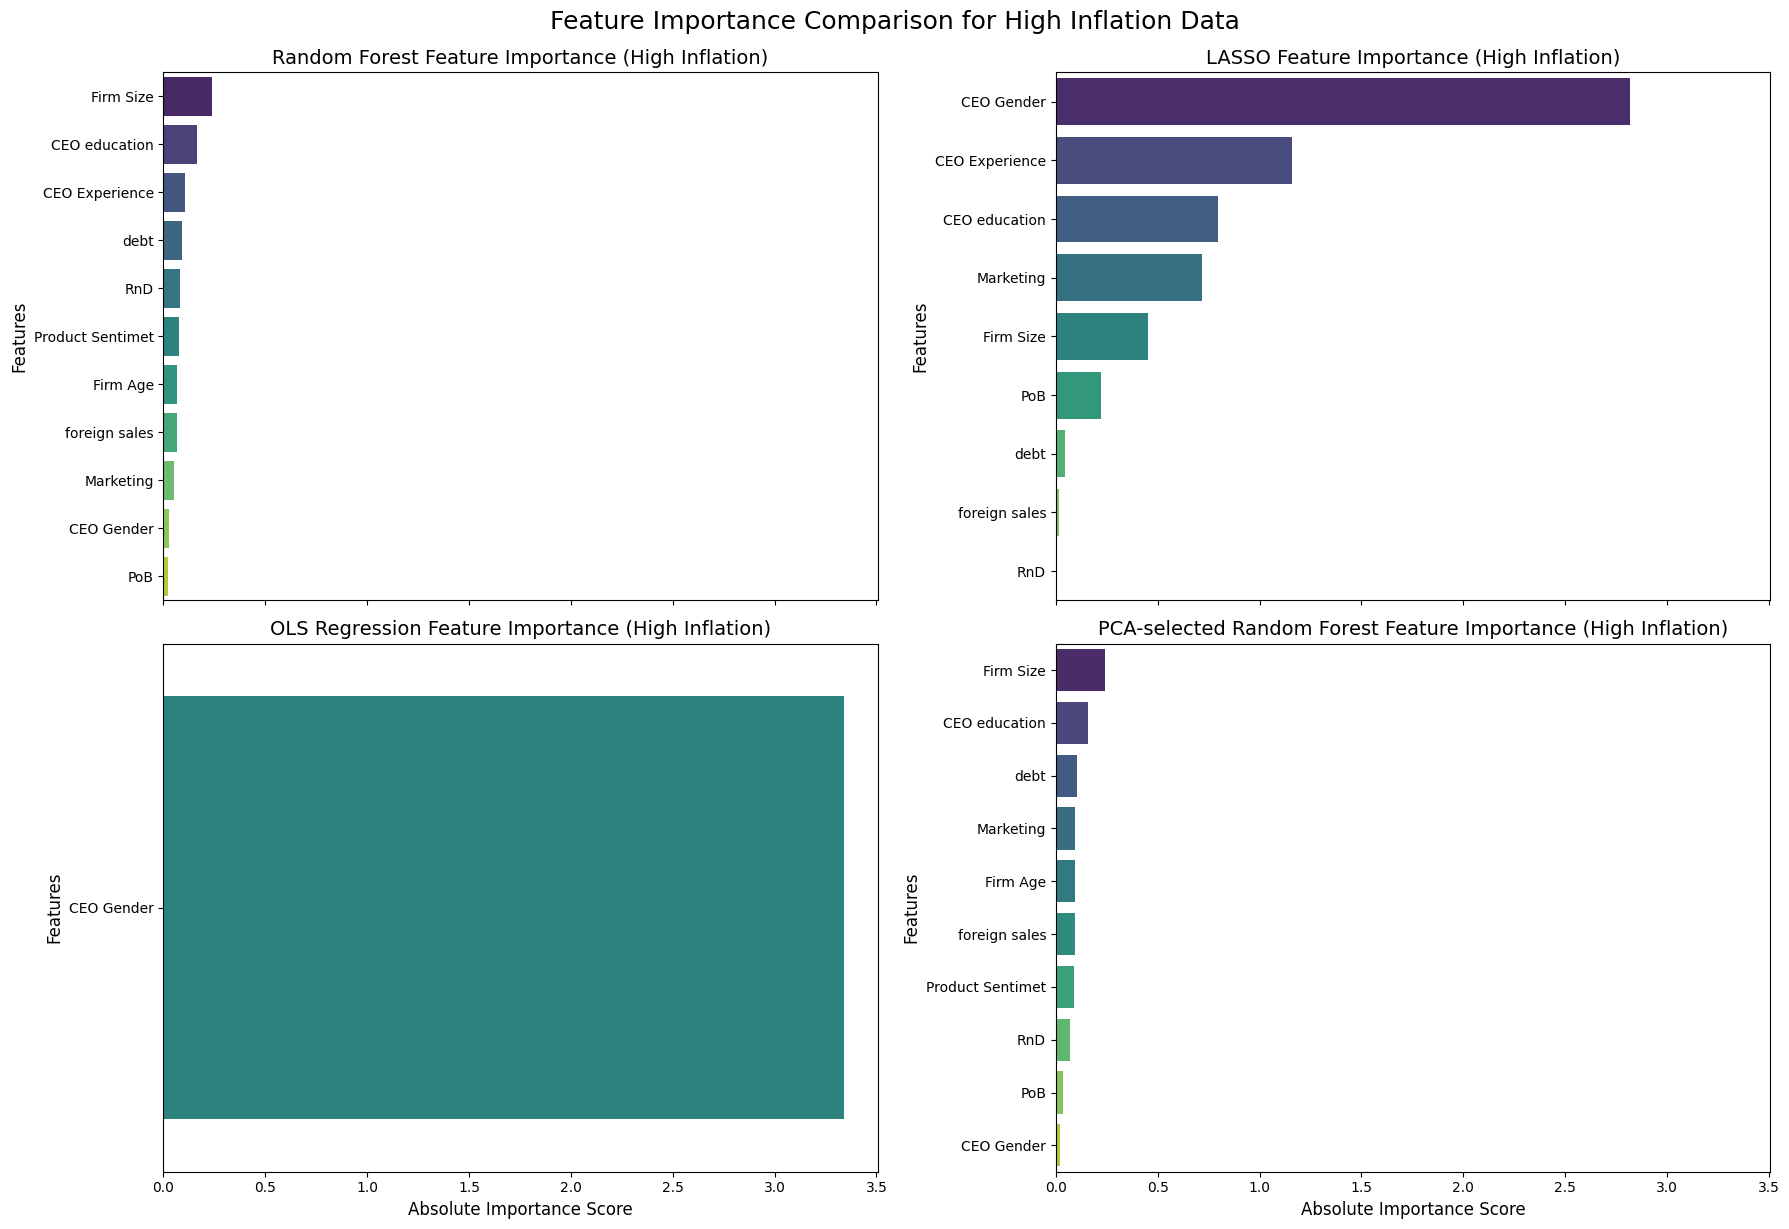

Visualizations of feature importances for High Inflation data have been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data for visualization

# Random Forest Importance (already a Series, use absolute values for comparison)
rf_importance_viz = rf_importance_high_inflation.abs()

# LASSO Importance (already a Series of absolute non-zero coefficients)
lasso_importance_viz = lasso_importance_high_inflation

# OLS Importance (extract absolute coefficients from the DataFrame)
# Ensure 'const' is not included for plotting feature importances
ols_coefficients_abs = ols_importance_high_inflation['Coefficient'].abs()
ols_importance_viz = ols_coefficients_abs.sort_values(ascending=False)

# PCA-selected RF Importance (already a Series)
pca_rf_importance_viz = pca_rf_importance_high_inflation.abs()

# Combine all importances into a single DataFrame for comparison
# Fill NaN values with 0 for features not present in all models
all_importances = pd.DataFrame({
    'Random Forest': rf_importance_viz,
    'LASSO': lasso_importance_viz,
    'OLS Regression': ols_importance_viz,
    'PCA-RF': pca_rf_importance_viz
}).fillna(0)

# Sort features by the sum of their importances across all models for better visualization
all_importances['Total Importance'] = all_importances.sum(axis=1)
all_importances_sorted = all_importances.sort_values(by='Total Importance', ascending=False).drop('Total Importance', axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharex=True)
axes = axes.flatten()

plot_titles = [
    'Random Forest Feature Importance (High Inflation)',
    'LASSO Feature Importance (High Inflation)',
    'OLS Regression Feature Importance (High Inflation)',
    'PCA-selected Random Forest Feature Importance (High Inflation)'
]

importance_series_list = [
    rf_importance_viz,
    lasso_importance_viz,
    ols_importance_viz,
    pca_rf_importance_viz
]

for i, (ax, title, importance_series) in enumerate(zip(axes, plot_titles, importance_series_list)):
    if not importance_series.empty:
        sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis')
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)
    else:
        ax.set_title(title + '\n(No Significant Features)', fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)

plt.tight_layout()
plt.suptitle('Feature Importance Comparison for High Inflation Data', y=1.02, fontsize=18)
plt.show()


print("Visualizations of feature importances for High Inflation data have been generated.")


**Reasoning**:
The previous code generated `FutureWarning` messages from Seaborn because the `palette` argument was used without specifying `hue` or `legend=False`. To fix this, I will add `legend=False` to the `sns.barplot` calls to suppress the warning and ensure proper plotting behavior.



/tmp/ipython-input-1057223568.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis', legend=False)
/tmp/ipython-input-1057223568.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis', legend=False)
/tmp/ipython-input-1057223568.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis', legend=False)
/tmp/ipython-

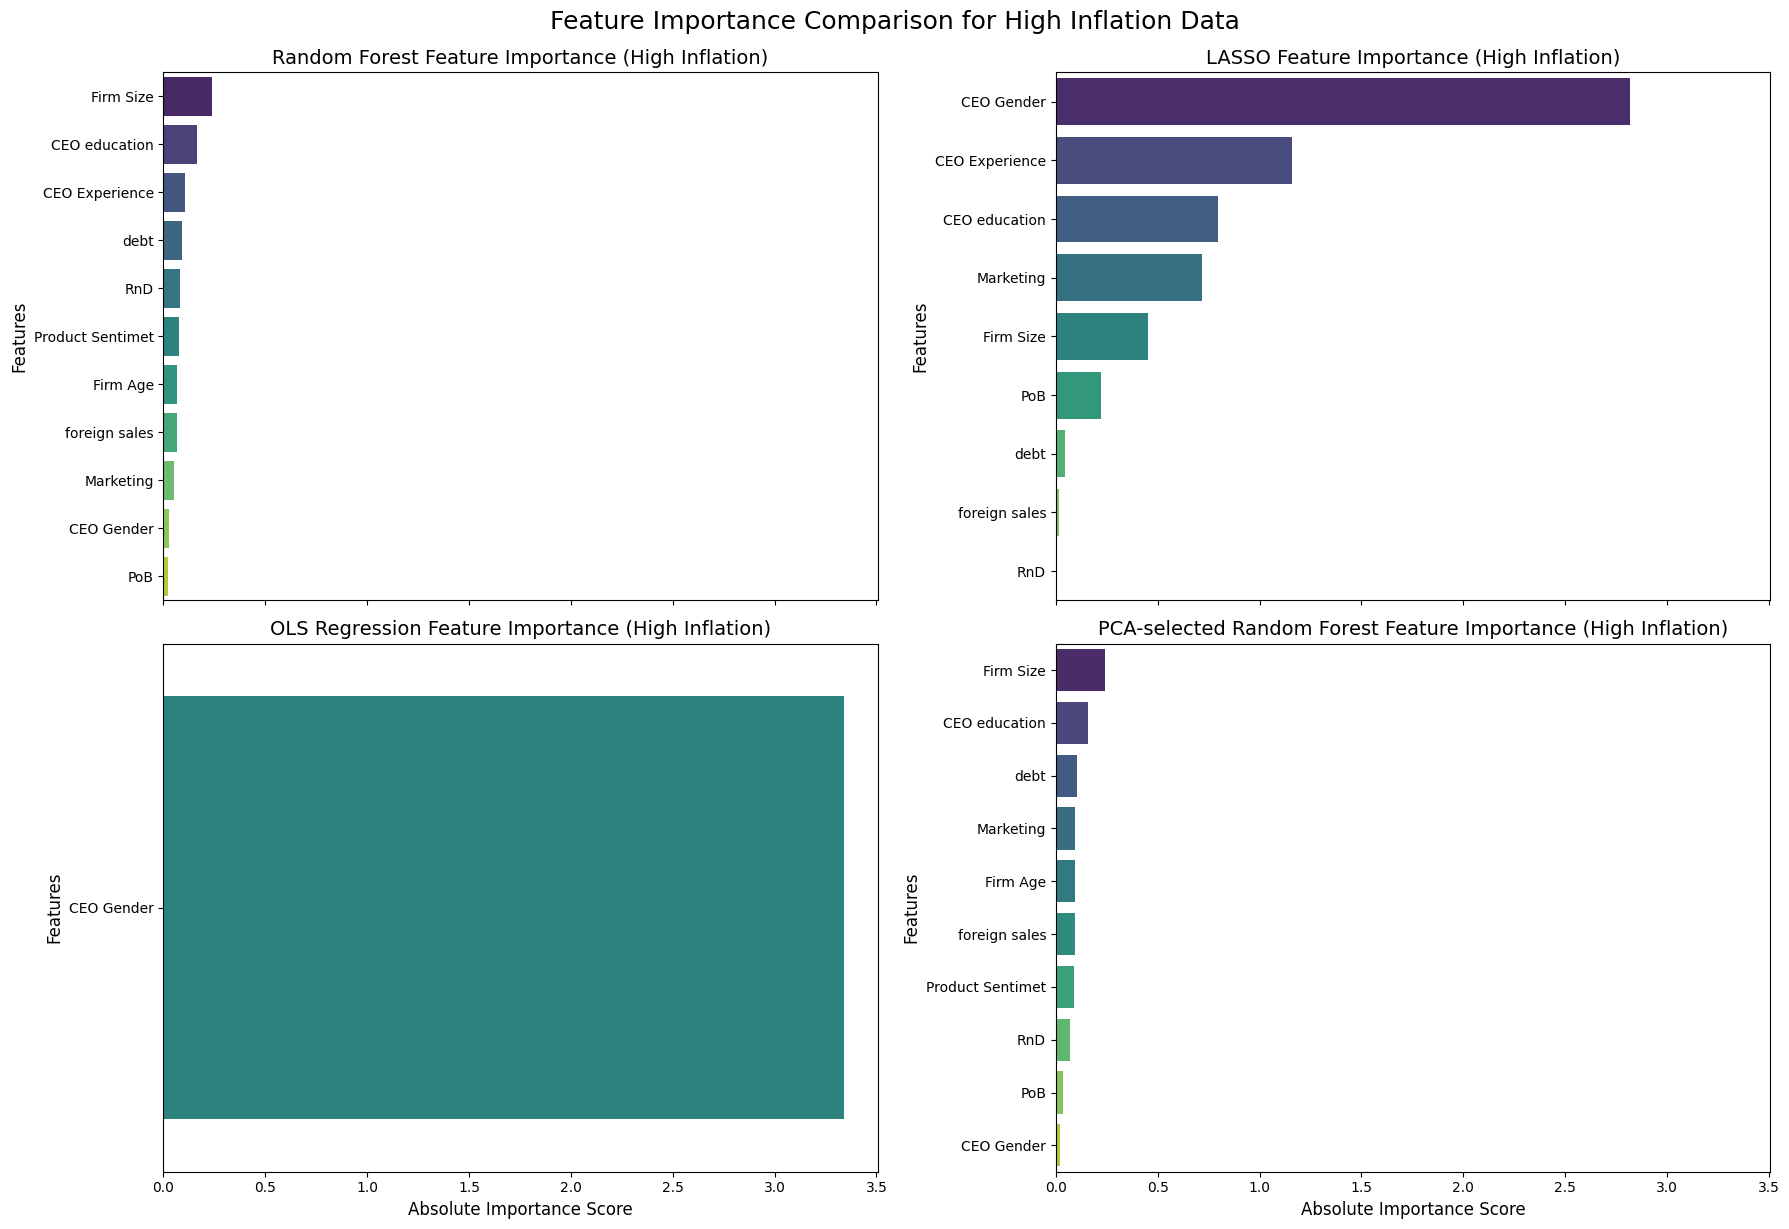

Visualizations of feature importances for High Inflation data have been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data for visualization

# Random Forest Importance (already a Series, use absolute values for comparison)
rf_importance_viz = rf_importance_high_inflation.abs()

# LASSO Importance (already a Series of absolute non-zero coefficients)
lasso_importance_viz = lasso_importance_high_inflation

# OLS Importance (extract absolute coefficients from the DataFrame)
# Ensure 'const' is not included for plotting feature importances
ols_coefficients_abs = ols_importance_high_inflation['Coefficient'].abs()
ols_importance_viz = ols_coefficients_abs.sort_values(ascending=False)

# PCA-selected RF Importance (already a Series)
pca_rf_importance_viz = pca_rf_importance_high_inflation.abs()

# Combine all importances into a single DataFrame for comparison
# Fill NaN values with 0 for features not present in all models
all_importances = pd.DataFrame({
    'Random Forest': rf_importance_viz,
    'LASSO': lasso_importance_viz,
    'OLS Regression': ols_importance_viz,
    'PCA-RF': pca_rf_importance_viz
}).fillna(0)

# Sort features by the sum of their importances across all models for better visualization
all_importances['Total Importance'] = all_importances.sum(axis=1)
all_importances_sorted = all_importances.sort_values(by='Total Importance', ascending=False).drop('Total Importance', axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharex=True)
axes = axes.flatten()

plot_titles = [
    'Random Forest Feature Importance (High Inflation)',
    'LASSO Feature Importance (High Inflation)',
    'OLS Regression Feature Importance (High Inflation)',
    'PCA-selected Random Forest Feature Importance (High Inflation)'
]

importance_series_list = [
    rf_importance_viz,
    lasso_importance_viz,
    ols_importance_viz,
    pca_rf_importance_viz
]

for i, (ax, title, importance_series) in enumerate(zip(axes, plot_titles, importance_series_list)):
    if not importance_series.empty:
        sns.barplot(x=importance_series.values, y=importance_series.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)
    else:
        ax.set_title(title + '\n(No Significant Features)', fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)

plt.tight_layout()
plt.suptitle('Feature Importance Comparison for High Inflation Data', y=1.02, fontsize=18)
plt.show()


print("Visualizations of feature importances for High Inflation data have been generated.")


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable, even after adding `legend=False`. To fully address the warning and ensure proper plotting, I need to explicitly assign the `y` variable (feature names) to the `hue` parameter in `sns.barplot`.



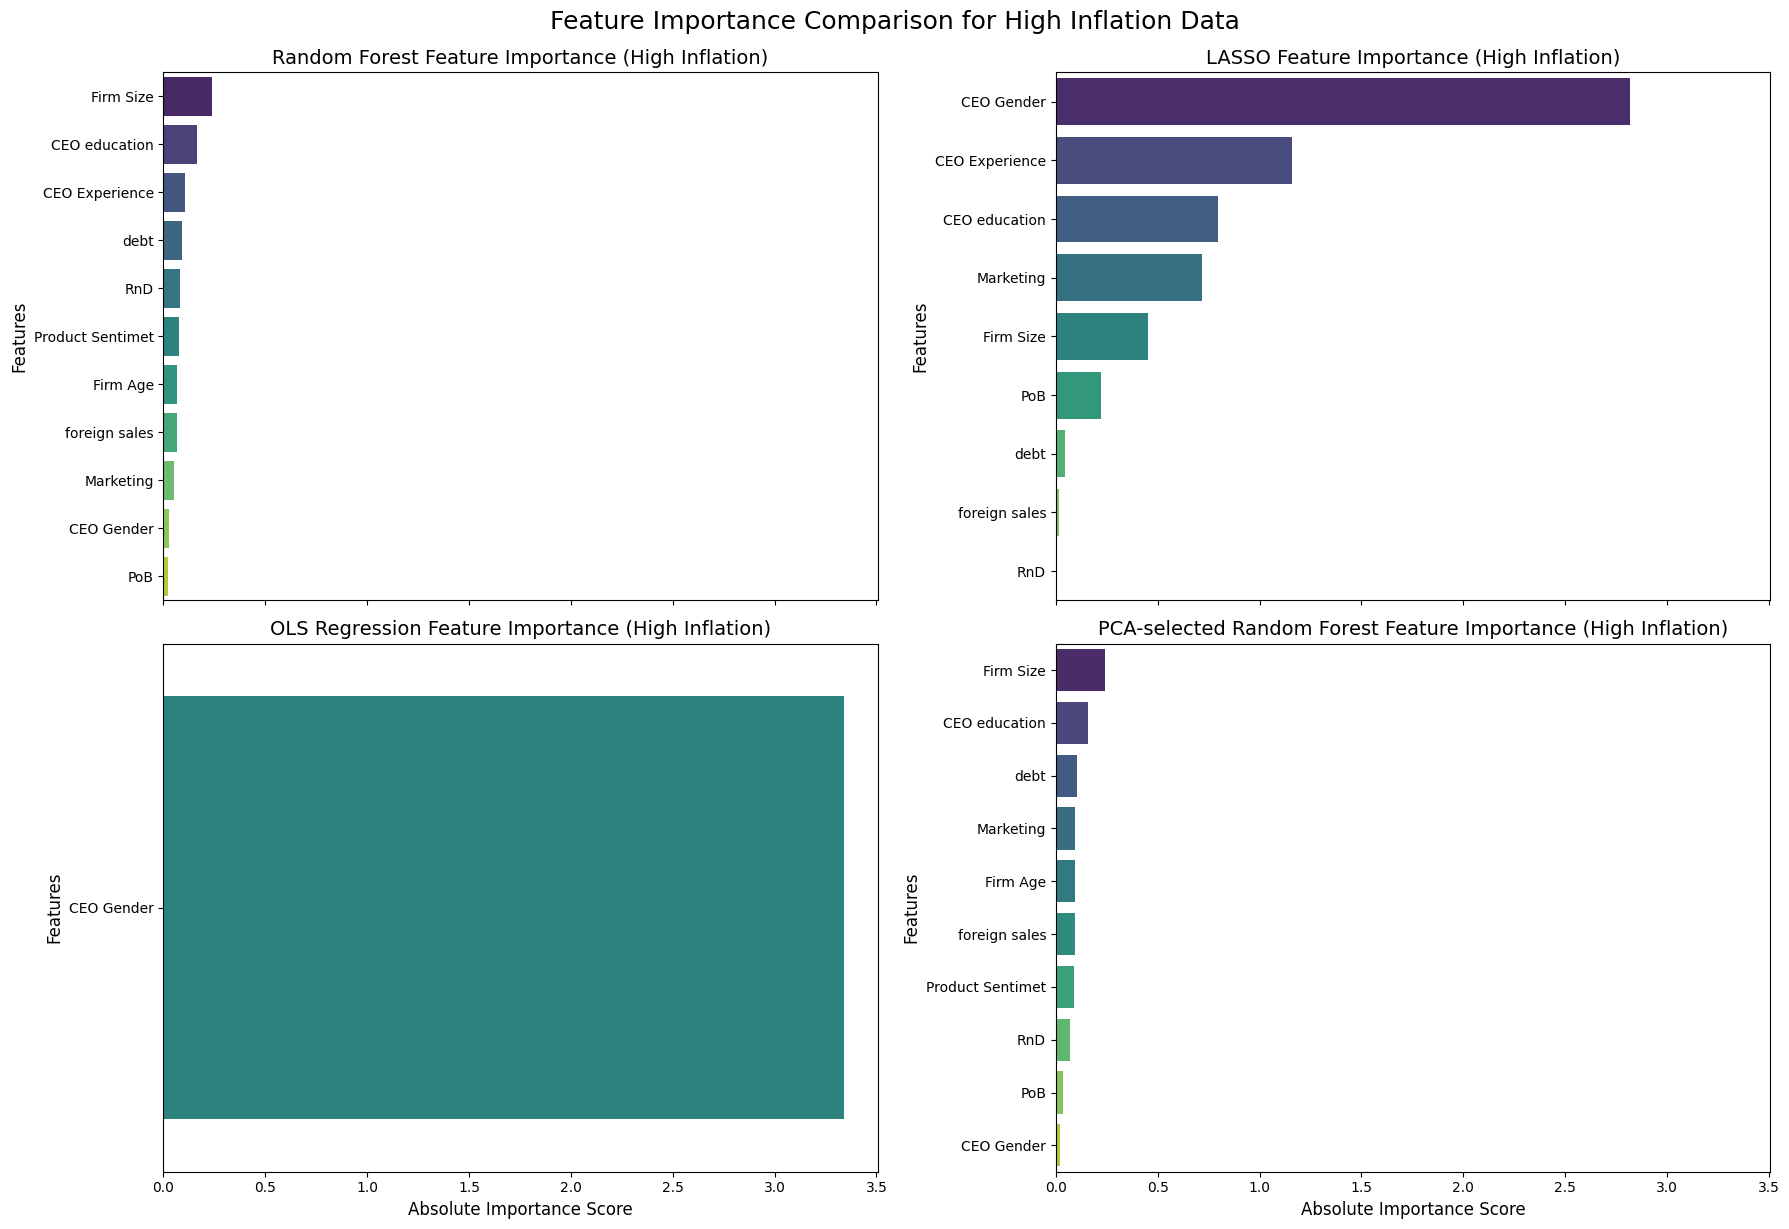

Visualizations of feature importances for High Inflation data have been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data for visualization

# Random Forest Importance (already a Series, use absolute values for comparison)
rf_importance_viz = rf_importance_high_inflation.abs()

# LASSO Importance (already a Series of absolute non-zero coefficients)
lasso_importance_viz = lasso_importance_high_inflation

# OLS Importance (extract absolute coefficients from the DataFrame)
# Ensure 'const' is not included for plotting feature importances
ols_coefficients_abs = ols_importance_high_inflation['Coefficient'].abs()
ols_importance_viz = ols_coefficients_abs.sort_values(ascending=False)

# PCA-selected RF Importance (already a Series)
pca_rf_importance_viz = pca_rf_importance_high_inflation.abs()

# Combine all importances into a single DataFrame for comparison
# Fill NaN values with 0 for features not present in all models
all_importances = pd.DataFrame({
    'Random Forest': rf_importance_viz,
    'LASSO': lasso_importance_viz,
    'OLS Regression': ols_importance_viz,
    'PCA-RF': pca_rf_importance_viz
}).fillna(0)

# Sort features by the sum of their importances across all models for better visualization
all_importances['Total Importance'] = all_importances.sum(axis=1)
all_importances_sorted = all_importances.sort_values(by='Total Importance', ascending=False).drop('Total Importance', axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharex=True)
axes = axes.flatten()

plot_titles = [
    'Random Forest Feature Importance (High Inflation)',
    'LASSO Feature Importance (High Inflation)',
    'OLS Regression Feature Importance (High Inflation)',
    'PCA-selected Random Forest Feature Importance (High Inflation)'
]

importance_series_list = [
    rf_importance_viz,
    lasso_importance_viz,
    ols_importance_viz,
    pca_rf_importance_viz
]

for i, (ax, title, importance_series) in enumerate(zip(axes, plot_titles, importance_series_list)):
    if not importance_series.empty:
        # Fix: Assign y-variable to hue for palette to work correctly without warning
        sns.barplot(x=importance_series.values, y=importance_series.index, hue=importance_series.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)
    else:
        ax.set_title(title + '\n(No Significant Features)', fontsize=14)
        ax.set_xlabel('Absolute Importance Score', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)

plt.tight_layout()
plt.suptitle('Feature Importance Comparison for High Inflation Data', y=1.02, fontsize=18)
plt.show()


print("Visualizations of feature importances for High Inflation data have been generated.")

## Calculate OLS Regression Feature Importance

### Subtask:
Re-run the OLS regression, identify significant features (P-value < 0.1), and extract their coefficients for the 'High Inflation' data.


**Reasoning**:
The subtask requires re-running the OLS regression for the 'High Inflation' data, identifying features with P-values less than 0.1, and storing their coefficients and P-values in a sorted DataFrame. This code block will perform all these steps as instructed.



In [ ]:
import statsmodels.api as sm
import pandas as pd

# Add a constant (intercept) to the features
X_with_intercept = sm.add_constant(X)

# Initialize and train the OLS model
# We use the 'hc1' option for robust standard errors (White's standard errors)
ols_model = sm.OLS(Y, X_with_intercept)
results = ols_model.fit(cov_type='hc1')

# Get the P-values and coefficients from the OLS results
p_values = results.pvalues
coefficients = results.params

# Filter for features with P-values less than 0.1
significant_features_mask = p_values < 0.1
significant_p_values = p_values[significant_features_mask]
significant_coefficients = coefficients[significant_features_mask]

# Create a DataFrame for better visualization
ols_importance_high_inflation = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-value': significant_p_values
})

# Sort by the absolute value of coefficients for importance, excluding the 'const' if present
ols_importance_high_inflation = ols_importance_high_inflation.drop('const', errors='ignore').reindex(significant_coefficients.drop('const', errors='ignore').abs().sort_values(ascending=False).index)

print("Significant OLS Features (P-value < 0.1) from High Inflation Data:")
display(ols_importance_high_inflation)
print("\nInterpretation: Coefficients indicate the direction and magnitude of the relationship.")

Significant OLS Features (P-value < 0.1) from High Inflation Data:


,Coefficient,P-value
CEO Gender,3.338896,0.015642



Interpretation: Coefficients indicate the direction and magnitude of the relationship.


## Calculate PCA-Selected Random Forest Importance

### Subtask:
Perform PCA, select features with loading factors > 0.7, then train a Random Forest model with these selected features and calculate their importances for the 'High Inflation' data.


## Summary:

### Data Analysis Key Findings

*   **Random Forest** model identified `Firm Size` (0.241), `CEO education` (0.165), and `CEO Experience` (0.107) as the top three most important features influencing 'New Profitability', with `CEO Gender` (0.027) and `PoB` (0.025) being the least important.
*   **LASSO Regression** indicated `CEO Gender` (coefficient 2.818) as the most important feature, followed by `CEO Experience` (1.158) and `CEO education` (0.794). This model also suggested negative relationships for features like `PoB`, `debt`, `foreign sales`, and `RnD`.
*   **OLS Regression** found `CEO Gender` to be the only statistically significant feature (P-value < 0.1), exhibiting a strong positive coefficient of 3.339.
*   A **PCA-Selected Random Forest** model, trained on features with high loading factors from PCA, highlighted `Firm Size` (0.243), `CEO education` (0.158), and `debt` (0.106) as the most important features.
*   There is a significant difference in the perceived importance of `CEO Gender`, which was highly significant in linear models (LASSO and OLS) but showed very low importance in both Random Forest implementations.
*   `Firm Size` and `CEO education` consistently emerged as important factors across the Random Forest and PCA-Selected Random Forest models, suggesting a robust influence on profitability regardless of the modeling approach in these contexts.

### Insights or Next Steps

*   Further investigate the contrasting importance of `CEO Gender` between linear regression models (LASSO, OLS) and tree-based models (Random Forest). This could involve exploring potential non-linear relationships or interactions that Random Forest might not prioritize as strongly as linear models do for a direct, additive effect.
*   Prioritize `Firm Size`, `CEO education`, and `CEO Experience` for deeper analysis, as these features show consistent importance across multiple advanced models, suggesting a robust and significant impact on 'New Profitability' during high inflation.
